<a href="https://colab.research.google.com/github/Jignacio14/7506R-1C2023-GRUPO09/blob/Pruebas/7506R_TP1_GRUPO9_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pruebas

En este apartado se estara trabajando el analisis exploratorio de los datos que se estaran usando para el trabajo practico #1

In [75]:
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt

In [11]:
hotelsDfOriginal = pd.read_csv("./hotels_train.csv")
hotelsdf = hotelsDfOriginal.copy()

print("El data frame esta compuesto por "f"{hotelsdf.shape[0]}"" filas y "f"{hotelsdf.shape[1]}"" columnas")

El data frame esta compuesto por 61913 filas y 33 columnas


Un vistaso básico a la información contenida en el dataframe viene dada por:

In [12]:
pd.concat([hotelsdf.head(2), hotelsdf.sample(5), hotelsdf.tail(2)])

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,NaN,0,Transient,115.50,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,0,Transient,42.00,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
28222,City Hotel,75,2017,May,20,20,2,1,1,0.0,...,NaN,0,Transient-Party,80.00,0,0,Canceled,2017-04-10,5c261d95-8eb6-451a-a968-c3aa9afae644,1
1336,City Hotel,71,2016,April,17,23,2,3,2,0.0,...,NaN,0,Transient,84.15,0,0,Canceled,2016-03-18,ee421edb-efb7-4b48-b241-b67b8a837829,1
16212,Resort Hotel,14,2017,July,28,10,1,1,2,0.0,...,NaN,0,Transient,160.00,0,1,Check-Out,2017-07-12,7655f0e4-cc97-4703-b94f-897ed7c9fbcc,0
42453,Resort Hotel,1,2016,January,2,6,0,2,1,0.0,...,204.0,0,Transient,26.00,0,0,Check-Out,2016-01-08,58958b3a-479f-4115-b7d3-24d1a4661d3b,0
8778,City Hotel,170,2016,July,30,18,1,3,2,0.0,...,NaN,0,Transient,95.20,0,1,Canceled,2016-02-06,1cdd15f9-42c1-4141-9ae9-b1061982c3d2,1
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,NaN,0,Transient,36.05,0,0,Canceled,2015-07-08,01906859-1094-4e37-b13e-b015b594d159,1
61912,City Hotel,57,2016,April,17,17,2,5,2,0.0,...,NaN,0,Transient,143.29,0,0,Canceled,2016-04-09,7137e599-4442-41fb-b147-4aba9f344e38,1


In [ ]:
nuevas_columnas = {'hotel':'hotel',
    'lead_time':'anticipacion_dias',
    'arrival_date_year':'llegada_anio',
    'arrival_date_month':'llegada_mes',
    'arrival_date_week_number':'llegada_numero_semana',
    'arrival_date_day_of_month':'llegada_dia_del_mes',
    'stays_in_weekend_nights':'cantidad_noches_finDeSemana',
    'stays_in_week_nights':'cantidad_noches_semana',
    'adults':'cantidad_adultos',
    'children':'cantidad_ninios', #En el paper, dice que children es un int. Pero figura como float64. #TODO: Investigar
    'company':'ID_compania',
    'days_in_waiting_list': 'cantidad_dias_listaEspera',
    'customer_type': 'tipo_cliente',
    'adr': 'promedio_gastos_diarios', #No me termina de cerrar este valor
    'required_car_parking_spaces': 'cantidad_estacionamientos_pedidos',
    'total_of_special_requests': 'cantidad_pedidos_especiales',
    'reservation_status': 'estado_reserva',
    'reservation_status_date': 'estado_reserva_fecha',
    'id': 'id',
    'is_canceled': 'esta_cancelado',}

#hotelsdf.rename(columns = nuevas_columnas, inplace = True)

In [7]:
#pd.concat([hotelsdf.head(2), hotelsdf.sample(5), hotelsdf.tail(2)])

Por otro lado un vistazo un poco más detallado a la informacion contenida por el dataframe puede verse:

In [8]:
hotelsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29353 entries, 0 to 29352
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           29353 non-null  object 
 1   lead_time                       29353 non-null  int64  
 2   arrival_date_year               29353 non-null  int64  
 3   arrival_date_month              29353 non-null  object 
 4   arrival_date_week_number        29353 non-null  int64  
 5   arrival_date_day_of_month       29353 non-null  int64  
 6   stays_in_weekend_nights         29353 non-null  int64  
 7   stays_in_week_nights            29353 non-null  int64  
 8   adults                          29353 non-null  int64  
 9   children                        29352 non-null  float64
 10  babies                          29353 non-null  int64  
 11  meal                            29353 non-null  object 
 12  country                         

Segun la clasificacion de las variables podemos establecer lo siguiente sobre los datos extraidos del dataframe

Variables cuantitativas, entre las cuales podemos encontrar:

· lead_time "time beetwen reservation and arrival"

· arrival_date_year

· arrival_date_week_number  
  
· arrival_date_day_of_month

· stays_in_weekend_nights

· days_in_waiting_list

· stays_in_week_nights

· adult

· children

· babies

· previous_cancellations

· previous_bookings_not_canceled

· booking_changes

· days_in_waiting_list

· adr "average day rate"

· required_car_parking_spaces

· total_of_special_requests

· reservation_status_date


<Axes: >

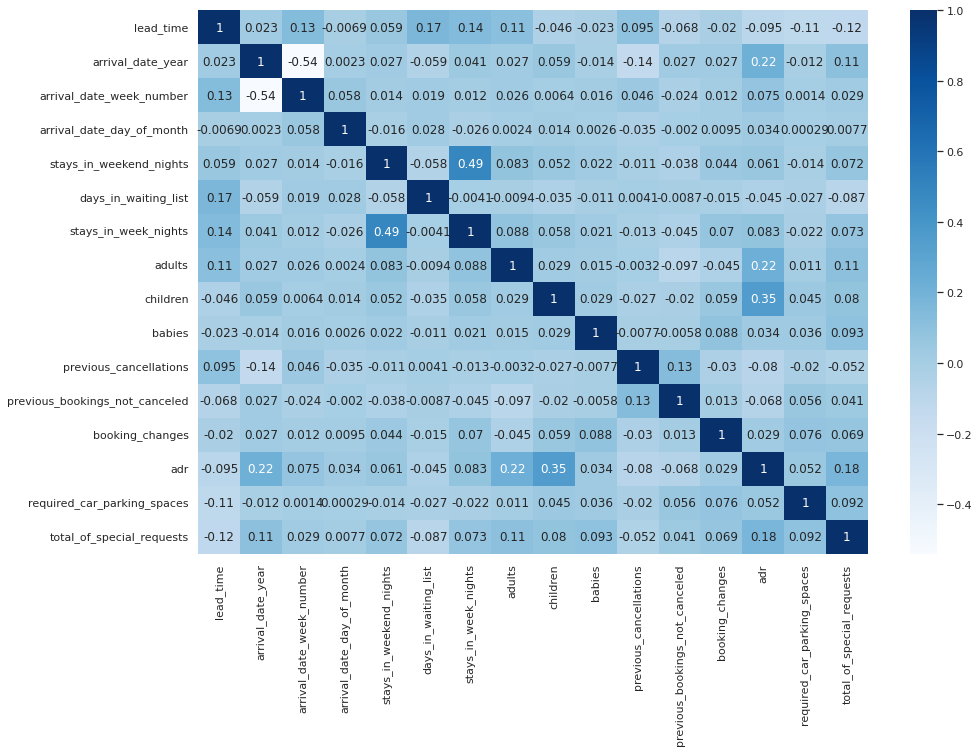

In [80]:
cuantitativas = ["lead_time"
,"arrival_date_year"
,"arrival_date_week_number"
,"arrival_date_day_of_month"
,"stays_in_weekend_nights"
,"days_in_waiting_list"
,"stays_in_week_nights"
,"adults"
,"children"
,"babies"
,"previous_cancellations"
,"previous_bookings_not_canceled"
,"booking_changes"
,"adr"
,"required_car_parking_spaces"
,"total_of_special_requests"
,"reservation_status_date"]

correlaciones = hotelsdf[cuantitativas].corr()

sns.set(style = 'darkgrid')
plt.figure( figsize = (15, 10))
sns.heatmap(data = correlaciones, annot = True, cmap = "Blues")

In [62]:
hotelsdf['arrival_date_month'].value_counts()

August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

In [48]:
hotelsdf.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


Variables cualitativas

In [64]:
cualitativas = ['hotel',"arrival_date_month", 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

#no tiene sentido imprimir cosas como id, company, deposite_type

for variable in cualitativas:
  print(hotelsdf[variable].value_counts().index.tolist())



['City Hotel', 'Resort Hotel']
['August', 'July', 'May', 'April', 'October', 'June', 'September', 'March', 'February', 'December', 'November', 'January']
['BB', 'HB', 'SC', 'Undefined', 'FB']
['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BRA', 'BEL', 'USA', 'NLD', 'CHE', 'CN', 'AUT', 'CHN', 'SWE', 'POL', 'RUS', 'ISR', 'NOR', 'ROU', 'AUS', 'AGO', 'DNK', 'FIN', 'LUX', 'MAR', 'TUR', 'HUN', 'ARG', 'JPN', 'KOR', 'CZE', 'IND', 'GRC', 'ZAF', 'HRV', 'MEX', 'COL', 'DZA', 'IRN', 'LTU', 'BGR', 'CHL', 'EST', 'UKR', 'SRB', 'SVK', 'ARE', 'NZL', 'SAU', 'THA', 'MOZ', 'SVN', 'CYP', 'LVA', 'PHL', 'ISL', 'IDN', 'TWN', 'HKG', 'SGP', 'EGY', 'TUN', 'NGA', 'URY', 'GEO', 'MYS', 'LBN', 'AZE', 'CPV', 'BLR', 'MAC', 'KWT', 'VEN', 'JOR', 'PAK', 'ECU', 'PER', 'QAT', 'DOM', 'GIB', 'KAZ', 'PRI', 'CRI', 'MDV', 'SEN', 'MLT', 'ALB', 'IRQ', 'MKD', 'BOL', 'AND', 'ARM', 'JEY', 'BIH', 'FRO', 'TZA', 'MUS', 'OMN', 'CUB', 'GNB', 'CIV', 'KEN', 'CMR', 'MNE', 'BEN', 'TJK', 'ETH', 'GAB', 'BGD', 'BHR', 'ZMB', 'SYR', 'GTM', 'KN